In [0]:
!pip install scikit-plot

In [0]:
#!/usr/bin/env python
# coding: utf-8

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#y_train_ohe = ohe.fit_transform(y_train)
# Encoding training dataset

In [0]:
df= pd.read_csv("train.csv")

In [0]:
dx = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
dy_label = df.Activity.values.astype(object)

In [0]:
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [0]:
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)

In [0]:
#SVD APPLY
from sklearn.decomposition import PCA,TruncatedSVD
svd= TruncatedSVD(n_components = 150)
x=svd.fit(dx).transform(dx)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,dy,test_size=0.2, random_state=4)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 512, activation = 'relu', input_dim = 150))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
#classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))


In [0]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)

Y_train = to_categorical(Y_train)

In [0]:
hist=classifier.fit(X_train, Y_train, batch_size=350, epochs = 100, validation_data=(X_test,Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5881 samples, validate on 1471 samples
Epoch 1/100





5881/5881 [==============================] - 2s 339us/step - loss: 0.9018 - acc: 0.6934 - val_loss: 0.1278 - val_acc: 0.9565
Epoch 2/100
5881/5881 [==============================] - 1s 145us/step - loss: 0.0607 - acc: 0.9787 - val_loss: 0.0849 - val_acc: 0.9708
Epoch 3/100
5881/5881 [==============================] - 1s 141us/step - loss: 0.0365 - acc: 0.9878 - val_loss: 0.0800 - val_acc: 0.9714
Epoch 4/100
5881/5881 [==============================] - 1s 141us/step - loss: 0.0209 - acc: 0.9939 - val_loss: 0.0700 - val_acc: 0.9816
Epoch 5/100
5881/5881 [==============================] - 1s 141us/step - loss: 0.0058 - acc: 0.9981 - val_loss: 0.0627 - val_acc: 0.9823
Epoch 6/100
5881/5881 [==============================] - 1s 153us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9823
Epoch 7/100
5881/5881 [=====

In [0]:
y_pred = classifier.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)

[[1.0000000e+00 2.8567503e-11 4.8009116e-15 1.4505298e-12 2.1828715e-12
  1.9580275e-12]
 [5.8202859e-10 1.5692830e-15 7.2069470e-09 2.2834123e-10 3.8886130e-09
  1.0000000e+00]
 [1.0000000e+00 6.1648542e-12 1.0294004e-15 1.3511150e-15 3.0565599e-16
  6.4375619e-12]
 ...
 [9.9999976e-01 3.6648892e-10 3.7746854e-12 3.8290564e-12 1.2582713e-10
  2.7543376e-07]
 [2.8382233e-10 1.6003679e-10 4.0417895e-11 9.9998939e-01 1.3959131e-07
  1.0489882e-05]
 [1.1962045e-11 2.0515080e-14 2.3194888e-15 1.0000000e+00 2.0844070e-10
  2.9985220e-08]]
[[ True False False False False False]
 [False False False False False  True]
 [ True False False False False False]
 ...
 [ True False False False False False]
 [False False False  True False False]
 [False False False  True False False]]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)


[[262   0   0   0   0   0]
 [  0 278   6   0   0   0]
 [  0   9 267   0   0   0]
 [  1   0   0 238   0   1]
 [  0   0   0   1 177   0]
 [  0   0   0   1   1 229]]


In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,y_pred))

98.64038069340585 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.97      0.98      0.97       284
           2       0.98      0.97      0.97       276
           3       0.99      0.99      0.99       240
           4       0.99      0.99      0.99       178
           5       1.00      0.99      0.99       231

   micro avg       0.99      0.99      0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471
 samples avg       0.99      0.99      0.99      1471



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


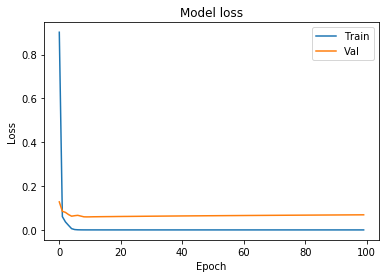

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



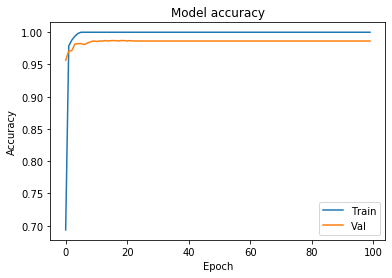

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

